

## Single-file queries:
* List all individuals who donated a TOTAL of over 100,000 dollars. Show name, city, state, employer, occupation, and total amount. [Tip: You must groupby name+city+state or by name+zipcode]
* List top 10 cities by total individual donations. Try creating a visual barchart with matplotlib.



### Data Set: Federal Elections Commission

http://classic.fec.gov/finance/disclosure/ftpdet.shtml files for download and the metadata.


 




## Multi-file queries (needing merge or join).  Some of these are good ways to see corruption in action:
* Find people who donated over 5000 directly to a Senate or House candidate who's not even in their own state, and show the details. [Tip: You'll need to compare the candidate's state to the individual donor's state after you get them joined.]
 http://classic.fec.gov/finance/disclosure/metadata/DataDictionaryPartyCodeDescriptions.shtml]

* Download all 3 individual donations files (itcont.txt) from 2014, 2016, and 2018. Figure out how to concatenate them (just the columns you need) into a single DataFrame covering that whole range from 2013-2018. Then use that to compute an analysis of questions such as:
    * Political activity is much higher for Presidential elections than in other years. Find out whether the level of donations to Senate and House campaigns goes up or down at that time compared to other years.
    * Find out how many and what percentage of individual donors have contributed to BOTH a Democratic and a Republican candidate at some point.
    

IMPORTING Pandas library as pd and numpy library as np

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


#Specifing the path where all data set files are kept along with header files of each data set

In [5]:
my_dir = './Files/'
indiv_header_file = my_dir + 'indiv_header_file.csv'
indiv_file = my_dir + 'itcont.txt' # individual donations



#Creating Function for reading the header file of individual data set

In [6]:
def get_columns(header_file) -> list:
    with open(header_file, 'r') as hf:
        top_line = hf.readline().strip()
    return top_line.split(',')

#Calling the function for reading the header file of individual donation 

In [7]:
# Read the Individual donation file header:
indiv_cols = get_columns(indiv_header_file)

#Printing the headers of individual donation file

In [8]:
indiv_cols

['CMTE_ID',
 'AMNDT_IND',
 'RPT_TP',
 'TRANSACTION_PGI',
 'IMAGE_NUM',
 'TRANSACTION_TP',
 'ENTITY_TP',
 'NAME',
 'CITY',
 'STATE',
 'ZIP_CODE',
 'EMPLOYER',
 'OCCUPATION',
 'TRANSACTION_DT',
 'TRANSACTION_AMT',
 'OTHER_ID',
 'TRAN_ID',
 'FILE_NUM',
 'MEMO_CD',
 'MEMO_TEXT',
 'SUB_ID']

#Reading the individual donation file by using pandas reader function

In [9]:

#  NOTE: The unique ID is the LAST column, not the first

my_date_parser = lambda dates: [pd.datetime.strptime(d, '%d%m%Y') for d in dates]

indiv = pd.read_csv(indiv_file, sep='|', index_col='SUB_ID', 
                    names=indiv_cols,
                    usecols=['NAME','CITY','STATE','ZIP_CODE',
                            'EMPLOYER','OCCUPATION',
                            'TRANSACTION_DT','TRANSACTION_AMT',
                            'CMTE_ID','ENTITY_TP','SUB_ID'],
                    dtype={'ZIP_CODE':str,'TRANSACTION_AMT':int,'CMTE_ID':str}
                    
                    )

C:\Users\tejve\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


* Question 1 .
List all individuals who donated a TOTAL of over 100,000 dollars. Show name, city, state, employer, occupation, and total amount. [Tip: You must groupby name+city+state or by name+zipcode]

#Reading the First 5 rows of individual donation file

In [11]:
indiv.head()

,CMTE_ID,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT
SUB_ID,,,,,,,,,,
2012520171368850783,C00629618,IND,"PEREZ, JOHN A",LOS ANGELES,CA,90017,PRINCIPAL,DOUBLE NICKEL ADVISORS,1032017.0,40
4020820171370029337,C00177436,IND,"DEEHAN, WILLIAM N",ALPHARETTA,GA,300047357,UNUM,"SVP, SALES, CL",1312017.0,384
4020820171370029334,C00177436,IND,"WATJEN, THOMAS R.",KEY LARGO,FL,330375267,UNUM,CHAIRMAN OF THE BOARD,1042017.0,5000
4020820171370029335,C00177436,IND,"SABOURIN, JAMES",LOOKOUT MOUNTAIN,GA,307502818,UNUM,"SVP, CORPORATE COMMUNICATIONS",1312017.0,230
4020820171370029336,C00177436,IND,"MAKER, SCOTT T.",NORTH YARMOUTH,ME,040976952,UNUM,"SVP, DEPUTY GENERAL COUNSEL, BUSINESS",1312017.0,384


#Creating the Data Frame having the required column asked in the question

In [12]:

indiv_frame=indiv[['NAME','CITY','STATE','EMPLOYER','OCCUPATION','TRANSACTION_AMT','ZIP_CODE','ENTITY_TP']]

#Subsetting the Frame with a condition so that we get individual donors

In [13]:
indiv_donor_frame=indiv[indiv['ENTITY_TP']=='IND']

#using the group by function so that we can the contribution of individual donors and we will get the output as series

In [14]:
indiv_donor_series=indiv_donor_frame.groupby(['NAME','ZIP_CODE'])['TRANSACTION_AMT'].sum()

#Applyting the condition so that we can get the donors who donated more than 100000$

In [15]:
indiv_donor_series>100000

NAME                       ZIP_CODE 
 ABDULLAH                  94534        False
 ALBERT                    943051026    False
 ALEX                      29464        False
 ALICE                     19085        False
                           450569273    False
 ALLEN                     441202425    False
 ALLEN C                   90230        False
 ALYSSA                    799365412    False
 AMADOR                    75115        False
 AMY                       276122665    False
 ANDERSON                  27886        False
 ANN                       209105401    False
 ANN M                     454582689    False
 ANTHONY J MR              142091041    False
 ARI                       900671600    False
 ARTHUR                    940251916    False
 ASSENMACHOR, WILLIAM MR.  26945        False
 B                         857184717    False
 BARRY                     38017        False
 BETH                      481043508    False
 BIRD                      57108        Fal

#Subseting the series to get the donors who donated more than 100000$

In [16]:
indiv_donor_series_1=indiv_donor_series[indiv_donor_series>100000]

#Converting the series to data frame

In [17]:
indiv_big_donors=indiv_donor_series_1.to_frame()

#Merging the two frames with required indexes in both the frames

In [18]:
Big_donor_final=pd.merge(indiv_big_donors,indiv_frame, left_index=True, right_on=['NAME','ZIP_CODE'])

In [19]:
Big_donor_final.head()

,TRANSACTION_AMT_x,NAME,CITY,STATE,EMPLOYER,OCCUPATION,TRANSACTION_AMT_y,ZIP_CODE,ENTITY_TP
SUB_ID,,,,,,,,,
4042020171400066341,257700,"ABERLY, NAOMI D",BOSTON,MA,NONE,VOLUNTEER,250000,02108,IND
2080720171442828192,257700,"ABERLY, NAOMI D",BOSTON,MA,NOT EMPLOYED,NOT EMPLOYED,2700,02108,IND
4072620171433235210,257700,"ABERLY, NAOMI D",BOSTON,MA,NONE,VOLUNTEER,5000,02108,IND
4080420171442616280,105400,"ABRAHAM, S. DANIEL",WEST PALM BEACH,FL,ENERGY FOODS OF AMERICA LLC,CHAIRMAN,33900,334016161,IND
4080420171442731248,105400,"ABRAHAM, S. DANIEL",WEST PALM BEACH,FL,ENERGY FOODS OF AMERICA LLC,CHAIRMAN,66100,334016161,IND


#grouping the big donors to get the desired output

In [20]:
Big_donor_final.groupby(['NAME','CITY','STATE','ZIP_CODE','TRANSACTION_AMT_x'])['EMPLOYER'].apply(list)

NAME                        CITY              STATE  ZIP_CODE   TRANSACTION_AMT_x
ABERLY, NAOMI D             BOSTON            MA     02108      257700                                      [NONE, NOT EMPLOYED, NONE]
ABRAHAM, S. DANIEL          WEST PALM BEACH   FL     334016161  105400               [ENERGY FOODS OF AMERICA LLC, ENERGY FOODS OF ...
ADAMS, DAN                  GREENVILLE        SC     29615      153500               [THE CAPITAL CORPORATION, THE CAPITAL CORPORAT...
AINGE, MICHELLE TOOLSON     BOSTON            MA     02109      250000                                          [HOMEMAKER, HOMEMAKER]
ANSARY, HUSHANG HON.        HOUSTON           TX     770025014  244200                                           [STEWART & STEVENSON]
ANSARY, SHAHLA              HOUSTON           TX     770025014  244200                                                          [NONE]
ANSCHUTZ, NANCY P.          DENVER            CO     802023941  125000                                [THE A

####Question 2 .List top 10 cities by total individual donations. Try creating a visual barchart with matplotlib
##I will be doing the Total individual donation by individual members in the city

In [21]:
indiv.head()

,CMTE_ID,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT
SUB_ID,,,,,,,,,,
2012520171368850783,C00629618,IND,"PEREZ, JOHN A",LOS ANGELES,CA,90017,PRINCIPAL,DOUBLE NICKEL ADVISORS,1032017.0,40
4020820171370029337,C00177436,IND,"DEEHAN, WILLIAM N",ALPHARETTA,GA,300047357,UNUM,"SVP, SALES, CL",1312017.0,384
4020820171370029334,C00177436,IND,"WATJEN, THOMAS R.",KEY LARGO,FL,330375267,UNUM,CHAIRMAN OF THE BOARD,1042017.0,5000
4020820171370029335,C00177436,IND,"SABOURIN, JAMES",LOOKOUT MOUNTAIN,GA,307502818,UNUM,"SVP, CORPORATE COMMUNICATIONS",1312017.0,230
4020820171370029336,C00177436,IND,"MAKER, SCOTT T.",NORTH YARMOUTH,ME,040976952,UNUM,"SVP, DEPUTY GENERAL COUNSEL, BUSINESS",1312017.0,384


#Subsetting the individual members from the data frame

In [22]:
Indiv_people=indiv[indiv['ENTITY_TP']=='IND']

##Applying the group by function on state and city column calculating the total amount donated by particular city

In [23]:
Indiv_group=Indiv_people.groupby(['STATE','CITY'])['TRANSACTION_AMT'].sum()

#Converting the series to Data frame

In [24]:
indiv_TOP_CITIES=Indiv_group.to_frame()

##Calculating the top 10 cities from the data Frame

In [25]:
indiv_TOP_10_CITIES=indiv_TOP_CITIES.nlargest(10,'TRANSACTION_AMT')

#Showing the Top 10 cities donation in the pandas Data Frame

In [26]:
indiv_TOP_10_CITIES

,,TRANSACTION_AMT
STATE,CITY,
NY,NEW YORK,51764105
DC,WASHINGTON,22846681
CA,SAN FRANCISCO,20304048
TX,HOUSTON,14499531
CA,LOS ANGELES,13391937
IL,CHICAGO,12221677
TX,DALLAS,11902918
GA,ATLANTA,10608701
PA,PHILADELPHIA,7585115


In [27]:
##Plotting the Bar Chart

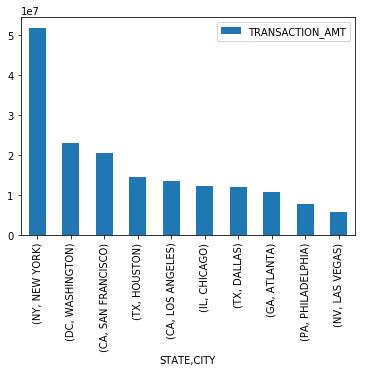

In [28]:

% matplotlib inline
indiv_TOP_10_CITIES.plot(kind='BAR')




 #(Self Question)List the top 5 organisation which donated the maximum amount.  ORG = Organization (not a committee and not a person)
 Then Plot the Bar Chart

#Viewing the top six enteries of the Data Frame

In [29]:
indiv.head()

,CMTE_ID,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT
SUB_ID,,,,,,,,,,
2012520171368850783,C00629618,IND,"PEREZ, JOHN A",LOS ANGELES,CA,90017,PRINCIPAL,DOUBLE NICKEL ADVISORS,1032017.0,40
4020820171370029337,C00177436,IND,"DEEHAN, WILLIAM N",ALPHARETTA,GA,300047357,UNUM,"SVP, SALES, CL",1312017.0,384
4020820171370029334,C00177436,IND,"WATJEN, THOMAS R.",KEY LARGO,FL,330375267,UNUM,CHAIRMAN OF THE BOARD,1042017.0,5000
4020820171370029335,C00177436,IND,"SABOURIN, JAMES",LOOKOUT MOUNTAIN,GA,307502818,UNUM,"SVP, CORPORATE COMMUNICATIONS",1312017.0,230
4020820171370029336,C00177436,IND,"MAKER, SCOTT T.",NORTH YARMOUTH,ME,040976952,UNUM,"SVP, DEPUTY GENERAL COUNSEL, BUSINESS",1312017.0,384


#Subsetting to get all the Organisation

In [30]:
Indiv_organisation=indiv[indiv['ENTITY_TP']=='ORG']

In [31]:
Indiv_organisation.head()

,CMTE_ID,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT
SUB_ID,,,,,,,,,,
4021020171370429314,C00528455,ORG,INTERNATIONAL ALLIANCE OF THEATRICAL STAGE EMP...,NEW YORK,NY,10001,NaN,NaN,1192017.0,15000
4021320171370652762,C00427930,ORG,THE CHICKASAW NATION,ADA,OK,74820,NaN,NaN,1312017.0,2500
4021420171370795646,C00193433,ORG,ENCOMPASS ELEMENTS,COLMAR,PA,18915,NaN,NaN,1302017.0,298
4021320171370649097,C00556274,ORG,UNITED STEELWORKERS,PITTSBURGH,PA,152221214,NaN,NaN,1182017.0,175023
4021320171370658273,C00166348,ORG,RODEBERG PARTNERSHIP,MONTEVIDEO,MN,56265,NaN,NaN,1012017.0,1521


In [32]:
#Using the group by function and calculating the total sum donated by the organisation

In [33]:
Indiv_organisation_series=Indiv_organisation.groupby(['STATE','CITY','NAME','ENTITY_TP'])['TRANSACTION_AMT'].sum()

In [34]:
Indiv_organisation_series.head()

STATE  CITY      NAME                                          ENTITY_TP
AL     ANNISTON  WILLIAM JULIAN CPA                            ORG             300
       ATMORE    POARCH BAND OF CREEK INDIANS                  ORG          161200
                 POARCH BAND OF INDIANS                        ORG            5000
                 POARCH CREEK INDIANS                          ORG            7700
                 POARCH CREEK INDIANS TRIBAL GOVERNMENT FUNDS  ORG            5000
Name: TRANSACTION_AMT, dtype: int32

#Now converting the series to Frame

In [35]:
Indiv_organisation_Frame=Indiv_organisation_series.to_frame()

In [36]:
Indiv_organisation_Frame.head()

TRANSACTION_AMT
STATE CITY     NAME                                         ENTITY_TP                 
AL    ANNISTON WILLIAM JULIAN CPA                           ORG                    300
      ATMORE   POARCH BAND OF CREEK INDIANS                 ORG                 161200
               POARCH BAND OF INDIANS                       ORG                   5000
               POARCH CREEK INDIANS                         ORG                   7700
               POARCH CREEK INDIANS TRIBAL GOVERNMENT FUNDS ORG                   5000

#Find the five largest organisation who donated the maximum amount

In [37]:
Indiv_organisation_Largest=Indiv_organisation_Frame.nlargest(5,'TRANSACTION_AMT')

In [38]:
Indiv_organisation_Largest

TRANSACTION_AMT
STATE CITY       NAME                                         ENTITY_TP                 
DC    WASHINGTON AMERICAN ACTION NETWORK                      ORG                6142525
                 UNITED BROTHERHOOD OF CARPENTERS AND JOINERS ORG                4389797
                 DEMOCRATIC GOVERNORS ASSOCIATION (DGA)       ORG                3040000
                 AFSCME SPECIAL ACCOUNT                       ORG                2361087
MD    ANNAPOLIS  TARGETED PLATFORM MEDIA LLC                  ORG                1261553

#Now rested the index of the above Frames as we want to plot the Bar chart with selected column but we have multiple index so we need to reset .

In [39]:
Indiv_organisation_Largest_Reset_Index=Indiv_organisation_Largest.reset_index()

#Selected required columns from the above frame

In [40]:
Indiv_organisation_Largest_New_Index=Indiv_organisation_Largest_Reset_Index[['NAME','TRANSACTION_AMT']]

#Now the set index of the frame 'NAME'

In [41]:
Indiv_organisation_Largest_New_Index_Final=Indiv_organisation_Largest_New_Index.set_index('NAME')

# Plot the Bar Chart and See the organisation which donated the maximum amou

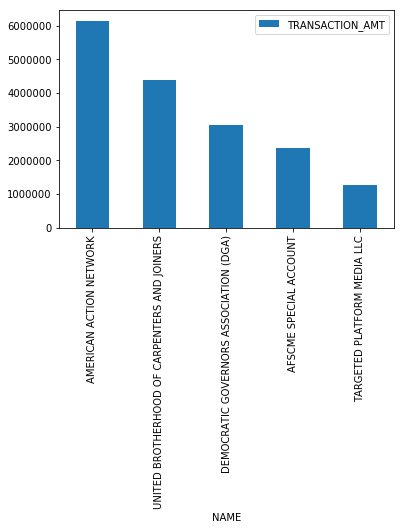

In [42]:
% matplotlib inline
Indiv_organisation_Largest_New_Index_Final.plot(kind='BAR')

Question.4
Multi-file queries (needing merge or join). Some of these are good ways to see corruption in action:
Find people who donated over 5000 directly to a Senate or House candidate who's not even in their own state, and show the details. [Tip: You'll need to compare the candidate's state to the individual donor's state after you get them joined.]

In [43]:
cn_header_file = my_dir + 'cn_header_file.csv'
cn_file = my_dir + 'cn.txt'  # Federal candidates

cm_header_file = my_dir + 'cm_header_file.csv'
cm_file = my_dir + 'cm.txt'  # Committees (funds and PACs)

In [44]:
cn_cols = get_columns(cn_header_file)
cm_cols = get_columns(cm_header_file)

In [45]:
cn = pd.read_csv(cn_file, sep='|', index_col='CAND_ID', 
                    names=cn_cols,
                    usecols=['CAND_ID','CAND_NAME','CAND_ST','CAND_CITY']
                    
                    )

In [46]:
cn.head()

,CAND_NAME,CAND_CITY,CAND_ST
CAND_ID,,,
H0AL02087,"ROBY, MARTHA",MONTGOMERY,AL
H0AL05049,"CRAMER, ROBERT E ""BUD"" JR",HUNTSVILLE,AL
H0AL05163,"BROOKS, MO",HUNTSVILLE,AL
H0AL06088,"COOKE, STANLEY KYLE",KIMBERLY,AL
H0AL07086,"SEWELL, TERRI A.",BIRMINGHAM,AL


In [47]:
cm = pd.read_csv(cm_file, sep='|', index_col='CMTE_ID', 
                    names=cm_cols,
                    usecols=['CAND_ID','CMTE_ID','CMTE_TP'],
                 dtype={'CMTE_ID':str,'CMTE_TP':str}
                )

In [48]:
cm.head()

,CMTE_TP,CAND_ID
CMTE_ID,,
C00000059,Q,NaN
C00000422,Q,NaN
C00000489,N,NaN
C00000547,Q,NaN
C00000638,Q,NaN


#Merge individual and committe file

In [49]:
indiv_cm=pd.merge(indiv,cm, left_on='CMTE_ID', right_index=True)

In [50]:
indiv_cm.head()

,CMTE_ID,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CMTE_TP,CAND_ID
SUB_ID,,,,,,,,,,,,
2012520171368850783,C00629618,IND,"PEREZ, JOHN A",LOS ANGELES,CA,90017,PRINCIPAL,DOUBLE NICKEL ADVISORS,1032017.0,40,H,H6CA34245
4020820171370029337,C00177436,IND,"DEEHAN, WILLIAM N",ALPHARETTA,GA,300047357,UNUM,"SVP, SALES, CL",1312017.0,384,Q,NaN
4020820171370029334,C00177436,IND,"WATJEN, THOMAS R.",KEY LARGO,FL,330375267,UNUM,CHAIRMAN OF THE BOARD,1042017.0,5000,Q,NaN
4020820171370029335,C00177436,IND,"SABOURIN, JAMES",LOOKOUT MOUNTAIN,GA,307502818,UNUM,"SVP, CORPORATE COMMUNICATIONS",1312017.0,230,Q,NaN
4020820171370029336,C00177436,IND,"MAKER, SCOTT T.",NORTH YARMOUTH,ME,040976952,UNUM,"SVP, DEPUTY GENERAL COUNSEL, BUSINESS",1312017.0,384,Q,NaN


In [51]:
#Merge the above file with the candidate file

In [52]:
indiv_cm_cn=pd.merge(indiv_cm,cn, left_on='CAND_ID', right_index=True)

#Put the condition to select the individual persons

In [53]:
indiv_cm_cn_person= indiv_cm_cn[indiv_cm_cn['ENTITY_TP']=='IND']

#select the donation by Individual to house and senate

In [54]:
indiv_cm_cn_person_House_senate=indiv_cm_cn_person[(indiv_cm_cn['CMTE_TP']=='S') | (indiv_cm_cn['CMTE_TP']=='H')]

C:\Users\tejve\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [55]:
indiv_cm_cn_person_House_senate.head()

,CMTE_ID,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CMTE_TP,CAND_ID,CAND_NAME,CAND_CITY,CAND_ST
SUB_ID,,,,,,,,,,,,,,,
2012520171368850783,C00629618,IND,"PEREZ, JOHN A",LOS ANGELES,CA,90017,PRINCIPAL,DOUBLE NICKEL ADVISORS,1032017.0,40,H,H6CA34245,"PEREZ, JOHN A",LOS ANGELES,CA
4012720171368944039,C00574954,IND,"CALLOWAY, DAN",RIVIERA BEACH,FL,33404,NaN,NaN,12302016.0,750,H,H6FL18048,"TAYLOR, PRISCILLA ANN",WEST PALM BEACH,FL
4010920171359688282,C00603126,IND,"DELANY, PETER GRAHAM MR. JR",CHARLOTTESVILLE,VA,22906,DEL ROSSO FOR CONGRESS INC.,CAMPAIGN MANAGER,1052017.0,1532,H,H6VA05126,"DEL ROSSO, MICHAEL JOSEPH MR.",CHARLOTTESVILLE,VA
4012720171368948763,C00588871,IND,"ANDERSON, MARK MR.",LAKE SHORE,MN,56468,NaN,NaN,1242017.0,-500,H,H4MN08083,"MILLS, STEWART MR.",BRAINERD,MN
4020120171369236609,C00579102,IND,"KENT, JORIE",PALM BEACH,FL,334804631,NaN,NaN,1252017.0,-2700,H,H6FL18105,"KOZELL, RICK",JUPITER,FL


#Select the Individual donation to candidates which are not in their state 

In [56]:
indiv_cm_cn_person_state=indiv_cm_cn_person_House_senate[indiv_cm_cn_person_House_senate['STATE']!=indiv_cm_cn_person_House_senate['CAND_ST']]

#Calculate the Total donation by individual

In [57]:
indiv_cm_cn_person_state_series=(indiv_cm_cn_person_state.groupby(['NAME','STATE','CITY','CAND_ST'])['TRANSACTION_AMT'].sum())

#Create a boolean series for individuals who have donated more than 5000$

In [58]:
indiv_cm_cn_person_state_series>5000

NAME                  STATE  CITY                 CAND_ST
 ALEX                 SC     MOUNT PLEASANT       MO         False
 ALICE                PA     VILLANOVA            MA         False
 ANTHONY J MR         NY     BUFFALO              PA         False
 B                    AZ     TUCSON               NY         False
 BRENT                TX     DALLAS               CT         False
 CARLOS               PR     SAN JUAN             IN         False
 DAVID                HI     CAPTAIN COOK         TX         False
                      IL     CHICAO               MO         False
 DEBORAH              NC     DURHAM               WI         False
 ELISE                NY     BROOKLYN             CT         False
 ELLEN                PA     PHILADELPHIA         MA         False
 EMILE JR             NH     MANCHESTER           MO         False
 ERIN                 TX     DALLAS               MO         False
 EZRA                 PA     PHILADELPHIA         MO         False
 FAH

#Final output :All the individuals who have donated money outside their state

In [59]:
indiv_cm_cn_person_state_series[indiv_cm_cn_person_state_series>5000]

NAME                  STATE  CITY               CAND_ST
 ROBERTO              PR     CAROLINA           IN         10800
 VAUGHN II            TX     DALLAS             CT          6800
AARONSON, PAULA       TX     AUSTIN             WI         10800
ABDOO, RICHARD A      WI     MILWAUKEE          OH         12100
ABDULLAH, YASIN ABIB  OH     HILLIARD           MN          5400
ABERLY, NAOMI         MA     BOSTON             TX          5200
                                                WI         10800
ABERLY, NAOMI D       MA     BOSTON             OH          5400
ABOUSSIE, JOYCE       MO     SAINT LOUIS        CA          5400
                                                MI          5400
ABRAMONS, RONALD      DC     WASHINGTON         CA          5900
ABRAMS, JAMES D       IL     HIGHLAND PARK      MT          5400
ABRAMS, JEFFREY       CA     ENCINO             DC         21600
                                                MO          5400
ABRAMS, JEFFREY J     CA     SANTA